## **Task 1 - Preguntas Teóricas**

**1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation**

La definición de grafos computación son representaciones visuales o abstractas para las operaciones matemáticas las cuales muestran cómo los datos fluyen a través de diferentes nodos, los que representan operaciones, y con las cuales se puede llegar a producir un resultado final. Estos grafos son importantes en muchas aplicaciones que se utilizan hoy en día, sin embargo en el contexto del cálculo de gradientes los grafos se usan para visualizar y organizar las operaciones necesarias para realizar los cálculos de gradientes de una manera mucho más eficiente.

**2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo mejoraría el perceptrón que hizo en el laboratorio pasado?**

<u>Componentes de una red neuronal:</u>

- _Nodos:_ Son las unidades básicas de procesamiento de una red neuronal, en las cuales cada una recibe una entrada, se hace un cálculo y se produce una salida.

- _Pesos:_ También conocido como las conexiones de los nodos, estos representan la influencia que una nodo tiene sobre otro, la cual se va ajustando durante el entrenamiento para poder mejorar el rendimiento de la red.

- _Capas:_ Estas son agrupaciones de nodos que procesan la información en conjunto. Generalmente existen capas de entrada, ocultas y de salida.
    
- _Funciones de activación:_ Son funciones matemáticas aplicadas a la salida de cada neurona las cuales inducen no linealidad en la red y permiten que esta aprenda y modele relaciones más complejas.


<u>Pasos del entrenamiento de una red neuronal:</u>

- _Inicialización de pesos:_ Estos se inicializan de forma aleatoria mediante un método específico.

- _Forward pass:_ Capa por capa, se calculan las salidas de las neuronas mediante los pesos actuales y las funciones de activación.

- _Cálculo de pérdida:_ Aquí se compara la salida calculada con la deseada mediante una función de pérdida.

- _Backpropagation:_ Se calculan los gradientes de la función de pérdida con respecto a los pesos de la red, a la vez que las gradientes se propagan hacia atrás mediante la regla de la cadena.

- _Actualización de pesos:_ Los pesos de la red se ajustan para reducir la pérdida mediante un algoritmo de optimización.


<u>Mejora del perceptrón:</u>

Las capas ocultas de una red neuronal permiten que estas puedan aprender representaciones más complejas de un conjunto de datos, así como también permite modelar relaciones no lineales, así mismo, reemplazar la función de activación lineal de un perceptrón por una sigmoidal o una tangente hiperbólica puede llegar a mejorar el rendimiento. A pesar de que no siempre es más, sin embargo, generar un conjunto de datos de entrenamiento más grande puede ayudar a la capacidad de generalización y al rendimiento del modelo, siempre teniendo cuidado de no caer en un overfitting, también variar las configuraciones de los hiperparámetros puede mejorar el resultado del modelo. Todas estas estrategias pueden llegar a mejorar el perceptrón realizado anteriormente, sin embargo no deben aplicarse religiosamente todas, sino que deben ser evaluadas y seleccionadas según el caso.

**3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.**

El método de la silueta se refiere al determinar el número óptimo de clústers en el algoritmo. Este se basa en evaluar la cohesión y separación de los clústers para diferentes cantidades de ellos para así seleccionar el valor que maximice la cohesión y minimice la separación.

<u>Fórmula de la silueta:</u>

Para cada punto de datos i en el conjunto de datos se calcula la cohesión entre clústers como la distancia promedio entre en punto y todos los demás puntos dentro del mismo clúster. Luego se calcula la separación entre clústers como la distancia promedio entre el punto y todos los puntos del clúster más cercano. Por último se calcula el valor de la silueta para el punto como si=(bi - ai) / max(ai , bi)

<u>Asunciones:</u>

- Mientras más cercanos sean los puntos dentro de un clúster, se tendrá una alta cohesión intraclúster.

- Cuanto más lejos estén los clústers de uno del otro se tendrá una mayor separación interclúster.

- El valor de silueta puede variar entre -1 y 1, valor el cual, mientras más cercano a 1 sea indica que está bien clasificado, mientras que si es más cercano a -1 indica que el punto debería pertenecer a un clúster distinto porque puede estar mal clasificado, por su parte, si el valor es, o es cercano, a 0, el punto analizado está cerca del límite de dos clústers.

Entendiendo cómo se calculan los valores de silueta para los puntos, el valor de K debe seleccionarse para que se maximice el valor de Sk, lo que significa que se debe buscar que los clústers que se tengan proporcionen una buena cohesión y una separación de los clústers adecuada, es decir, se tiene que tener una alta coherencia y poca superposición de los clústers.

**4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:**

<u>a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?</u>

Al reducir la dimensionalidad de los datos y conservar la mayor parte de la variación de los datos antes de aplicar K-Means se elimina el ruido que pueda haber en los datos, así como se destacan las características más importantes, lo que deriva en una producción de mejores clústers. Al mismo tiempo, con esta reducción de dimensionalidad los clústers resultantes tienen una visualización e interpretación más sencilla y entendible.  K-Means también puede dar pesos desproporcionados a ciertas variables en el proceso de agrupamiento si hay variables altamente correlacionadas, por lo que eliminar esta multicolinealidad al transformar variables puede capturar mejor la estructura subyacente de los datos. 


## **Task 2**

### **Task 2.1 - K-Means y Segmentación de Clientes de Banco**

### Exploración de datos

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

df = pd.read_csv('bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [26]:
df['CustGender'].unique()
df[df['CustGender']=='T'] # solamente hay un dato. 


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
959987,T959988,C3380368,1/1/1800,T,CHENNAI,50050.0,10/9/16,170731,32500.0


In [27]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [28]:
df.isnull().sum()


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [30]:
# 'CustomerDOB' a datetime 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# 'TransactionDate' a datetime 
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [31]:
# Calculando la edad de cada ciente 
df['CusAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CusAge'].value_counts()
df['CusAge'] = df['CusAge'].abs()
df['CusAge'] 


0          22
1          41
2          20
3          57
4          28
           ..
1048562    26
1048563    24
1048564    27
1048565    38
1048566    32
Name: CusAge, Length: 1041613, dtype: int64

In [32]:
df.loc[df['CusAge'] > 100, 'CusAge']

16         216
22         216
28         216
35         216
151        216
          ... 
1048443    216
1048452    216
1048531    216
1048533    216
1048540    216
Name: CusAge, Length: 56291, dtype: int64

In [33]:
df = df.loc[df['CusAge'] <= 100]
df.loc[df['CusAge'] > 100, 'CusAge']

Series([], Name: CusAge, dtype: int64)

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            985322 non-null  object        
 1   CustomerID               985322 non-null  object        
 2   CustomerDOB              985322 non-null  datetime64[ns]
 3   CustGender               985322 non-null  object        
 4   CustLocation             985322 non-null  object        
 5   CustAccountBalance       985322 non-null  float64       
 6   TransactionDate          985322 non-null  datetime64[ns]
 7   TransactionTime          985322 non-null  int64         
 8   TransactionAmount (INR)  985322 non-null  float64       
 9   CusAge                   985322 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 82.7+ MB


In [35]:
# Calcular el Gasto Total por Cliente
total_spent_per_customer = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='TotalSpent')
total_spent_per_customer

,CustomerID,TotalSpent
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
839076,C9099836,691.0
839077,C9099877,222.0
839078,C9099919,126.0
839079,C9099941,50.0


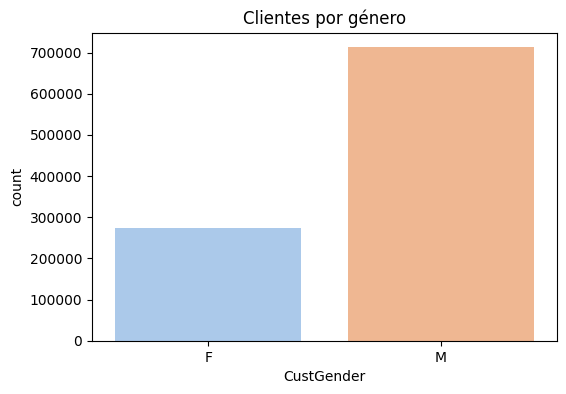

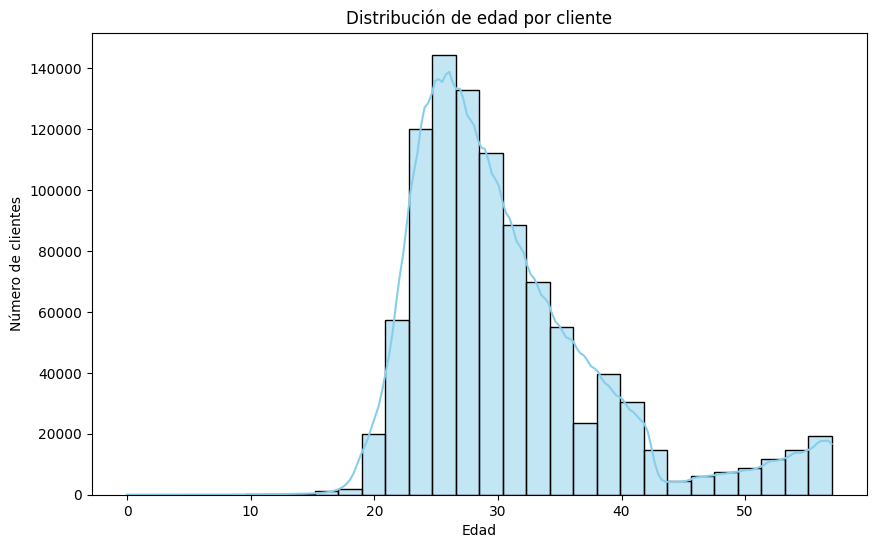

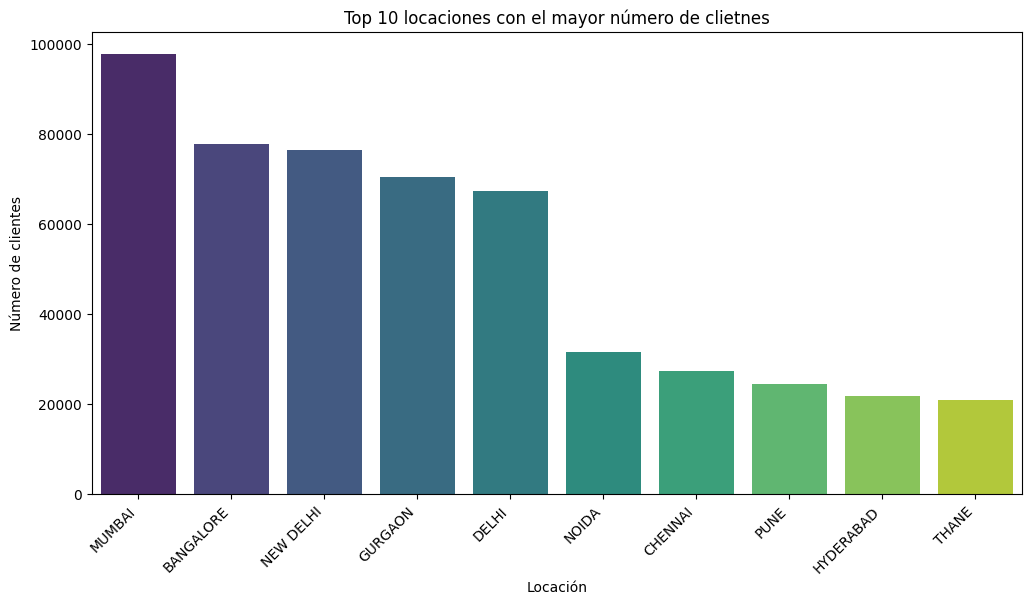

In [42]:
df1 = df.copy()
# Distribución de clientes por género
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Clientes por género')
plt.show()

# Edad de clientes
plt.figure(figsize=(10, 6))
sns.histplot(df1['CusAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edad por cliente')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.show()

# Locación del número de clientes 
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 locaciones con el mayor número de clietnes')
plt.xlabel('Locación')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Codificación y Escaler de datos

In [43]:
from sklearn.preprocessing import LabelEncoder

# Columnas no útiles para el análisis
df1.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

encoder = LabelEncoder()
df1['CustGender'] = encoder.fit_transform(df['CustGender'])
df1['CustLocation'] = encoder.fit_transform(df['CustLocation'])
df1

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,C5841053,0,3117,17819.05,2016-02-08,25.0,22
1,C2142763,1,3174,2270.69,2016-02-08,27999.0,41
2,C4417068,0,4625,17874.44,2016-02-08,459.0,20
3,C5342380,0,4625,866503.21,2016-02-08,2060.0,57
4,C9031234,0,4965,6714.43,2016-02-08,1762.5,28
...,...,...,...,...,...,...,...
1048562,C8020229,1,5066,7635.19,2016-09-18,799.0,26
1048563,C6459278,1,4943,27311.42,2016-09-18,460.0,24
1048564,C6412354,1,2954,221757.06,2016-09-18,770.0,27
1048565,C6420483,1,7979,10117.87,2016-09-18,1000.0,38


In [44]:
df1.drop('CustomerID', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               985322 non-null  int32         
 1   CustLocation             985322 non-null  int32         
 2   CustAccountBalance       985322 non-null  float64       
 3   TransactionDate          985322 non-null  datetime64[ns]
 4   TransactionAmount (INR)  985322 non-null  float64       
 5   CusAge                   985322 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1)
memory usage: 45.1 MB


In [45]:
scaler = StandardScaler()
# escalamiento de variables numericas
numerical = ['CustAccountBalance', 'TransactionAmount (INR)', 'CusAge']
df1[numerical] = scaler.fit_transform(df1[numerical])
df1.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
0,0,3117,-0.107888,2016-02-08,-0.232489,-1.078689
1,1,3174,-0.126898,2016-02-08,4.323714,1.265929
2,0,4625,-0.107820,2016-02-08,-0.161802,-1.325491
3,0,4625,0.929744,2016-02-08,0.098957,3.240344
4,0,4965,-0.121465,2016-02-08,0.050503,-0.338284


### **Task 2.1.1 - K-Means y Segmentación de Clientes de Banco**

### K-Means con librerías

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

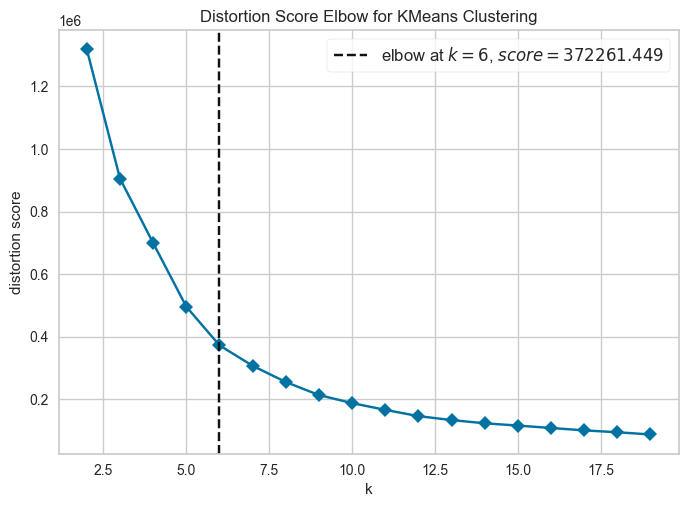

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

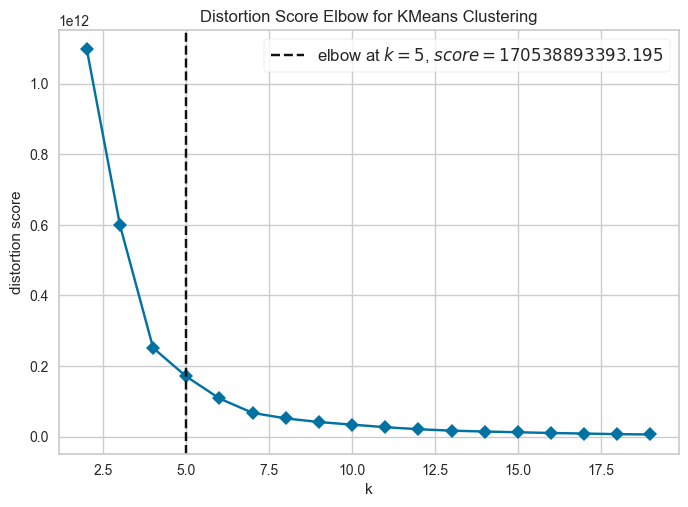

In [91]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Variables de segmentación
X = df1[['CusAge', 'TransactionAmount (INR)']].values
Y = df1[['CustLocation', 'TransactionAmount (INR)']].values


#  KMeans clustering y método del codo
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Método del codo para el cluster de la edad de clientes')
perform_elbow_method(Y, k_range=(2, 20), title='Método del codo para el cluster de la locación de clientes ')

In [92]:
# Cluster KMean  y centroides
def kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = kmeans_clustering(Y, num_clusters=7)

df1['cluster_age'] = x_cluster_labels
df1['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df1['cen_xx'] = df1.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df1['cen_xy'] = df1.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df1['cen_yx'] = df1.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df1['cen_yy'] = df1.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df1.head()

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0,3117,-0.107888,2016-02-08,-0.232489,-1.078689,1,6,-0.627997,-0.110306,2735.879454,-0.005555
1,1,3174,-0.126898,2016-02-08,4.323714,1.265929,3,6,0.442078,4.145672,2735.879454,-0.005555
2,0,4625,-0.107820,2016-02-08,-0.161802,-1.325491,1,0,-0.627997,-0.110306,4855.614941,0.018358
3,0,4625,0.929744,2016-02-08,0.098957,3.240344,5,0,2.665206,0.049606,4855.614941,0.018358
4,0,4965,-0.121465,2016-02-08,0.050503,-0.338284,1,0,-0.627997,-0.110306,4855.614941,0.018358


### **Task 2.2.1 - Mixture Models**

#### Utilizando Librerías

In [47]:
df1 = df1.drop(columns=['TransactionDate'])

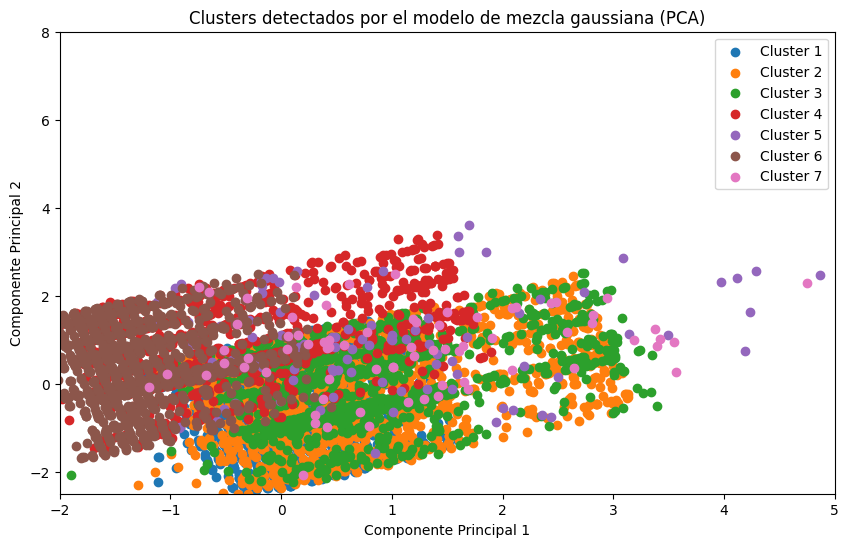

Silhouette Score: 0.05524858505030735


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Crear y ajustar el modelo de mezcla gaussiana
df2 = df1.copy()
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
clusters = 7
df2_sampled = df2_scaled[np.random.choice(df2_scaled.shape[0], 10000, replace=False), :]  # Reducir el tamaño del dataset para PCA
gmm = GaussianMixture(n_components=clusters, random_state=1)
gmm.fit(df2_sampled)

# Obtener las etiquetas de los clusters
labels = gmm.predict(df2_sampled)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2_sampled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
for i in range(clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')


plt.title('Clusters detectados por el modelo de mezcla gaussiana (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-2,5)
plt.ylim(-2.5,8)
# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
plt.legend()
plt.show()
silhouette_avg = silhouette_score(df2_sampled, labels)
print(f'Silhouette Score: {silhouette_avg}')

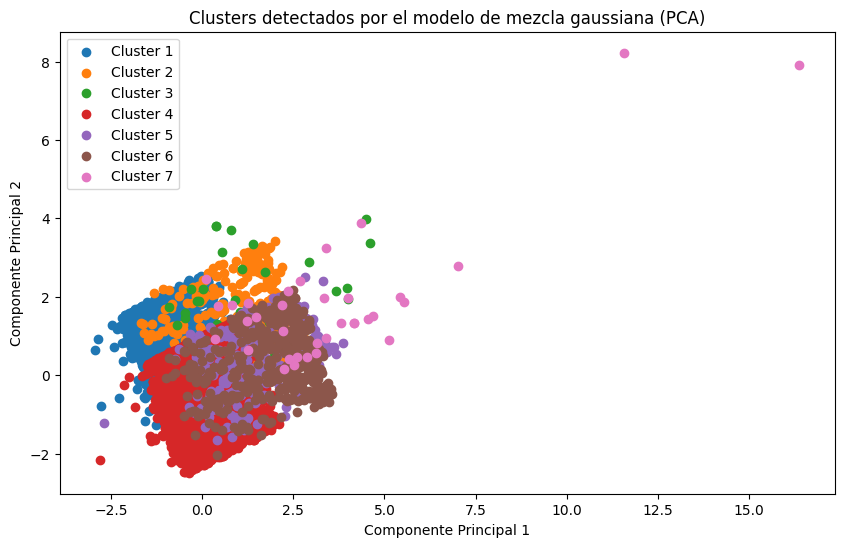

In [56]:
# Definir parámetros iniciales
num_clusters = 7
max_iterations = 100
tolerance = 1e-4

# Inicializar los parámetros del modelo
np.random.seed(1)
means = np.random.rand(num_clusters, df2_sampled.shape[1])
covariances = np.array([np.eye(df2_sampled.shape[1]) for _ in range(num_clusters)])
weights = np.ones(num_clusters) / num_clusters

# Función para calcular la probabilidad de un punto dado un cluster
def gaussian_probability(x, mean, covariance):
    # Add a small perturbation to the covariance matrix to make it non-singular
    covariance += 1e-5 * np.eye(covariance.shape[0])
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    return (1 / ((2 * np.pi) ** (len(x) / 2) * np.linalg.det(covariance) ** 0.5)) * np.exp(exponent)


# Expectation-Maximization algorithm
for iteration in range(max_iterations):
    # Expectation step
    responsibilities = np.zeros((df2_sampled.shape[0], num_clusters))
    for i in range(num_clusters):
        for j in range(df2_sampled.shape[0]):
            responsibilities[j, i] = weights[i] * gaussian_probability(df2_sampled[j], means[i], covariances[i])

    responsibilities_sum = np.sum(responsibilities, axis=1, keepdims=True)
    responsibilities_sum[responsibilities_sum == 0] = 1e-10  # Avoid division by zero
    responsibilities /= responsibilities_sum
    
    # Maximization step
    for i in range(num_clusters):
        N_i = np.sum(responsibilities[:, i])
        weights[i] = N_i / df2_sampled.shape[0]
        means[i] = np.sum(responsibilities[:, i].reshape(-1, 1) * df2_sampled, axis=0) / N_i
        covariances[i] = np.dot((responsibilities[:, i].reshape(-1, 1) * (df2_sampled - means[i])).T, (df2_sampled - means[i])) / N_i

# Obtener etiquetas de clusters
labels = np.argmax(responsibilities, axis=1)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2_sampled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')

plt.title('Clusters detectados por el modelo de mezcla gaussiana (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()
silhouette_avg = silhouette_score(df2_sampled, labels)
print(f'Silhouette Score: {silhouette_avg}')